In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x:'%.5f' % x)
import numpy as np
import matplotlib.pyplot as plt


In [2]:
types_dict_train = {'train_id':'int64', 'item_condition_id':'int8', 'price':'float64', 'shipping':'int8'}
types_dict_test = {'test_id':'int64', 'item_condition_id':'int8', 'shipping':'int8'}

train_df = pd.read_csv('train.tsv', delimiter='\t', low_memory=True, dtype=types_dict_train)
test_df = pd.read_csv('test.tsv', delimiter='\t', low_memory=True, dtype=types_dict_test)

In [3]:
train_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.00000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.00000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.00000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.00000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.00000,0,Complete with certificate of authenticity


In [4]:
test_df.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


train_id
name
item_condition_id 
category_name 
brand_name 
shipping
item_description

price

欠損地の確認

In [5]:
#欠損値のない行は表示しない
print("train_df")
print("欠損数と欠損率")
df_null=train_df.isnull().sum()[train_df.isnull().sum()>0]
df_rate = df_null/(train_df.isnull().count()[train_df.isnull().sum()>0]) *100

df_null_info = pd.concat([df_null,df_rate],axis=1)

df_null_info.columns=["loss","rate"]
display(df_null_info)
print()


print("test_df")
print("欠損数と欠損率")
df_null=test_df.isnull().sum()[test_df.isnull().sum()>0]
df_rate = df_null/(test_df.isnull().count()[test_df.isnull().sum()>0]) *100

df_null_info = pd.concat([df_null,df_rate],axis=1)

df_null_info.columns=["loss","rate"]
display(df_null_info)

train_df
欠損数と欠損率


,loss,rate
category_name,6327,0.42677
brand_name,632682,42.67569
item_description,4,0.00027



test_df
欠損数と欠損率


,loss,rate
category_name,3058,0.44104
brand_name,295525,42.62222


両データフレームのbrand_nameの欠損地が２割を超えているため削除する。

In [6]:
train_df = train_df.drop("brand_name",axis = 1)
test_df = test_df.drop("brand_name",axis = 1)

In [7]:
train_df.head()

,train_id,name,item_condition_id,category_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,10.00000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,52.00000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,10.00000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,35.00000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,44.00000,0,Complete with certificate of authenticity


In [8]:
test_df.head()

,test_id,name,item_condition_id,category_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,1,Rediscovering life after the loss of a loved o...


In [9]:
#欠損値のない行は表示しない
print("train_df")
print("欠損数と欠損率")
df_null=train_df.isnull().sum()[train_df.isnull().sum()>0]
df_rate = df_null/(train_df.isnull().count()[train_df.isnull().sum()>0]) *100

df_null_info = pd.concat([df_null,df_rate],axis=1)

df_null_info.columns=["loss","rate"]
display(df_null_info)
print()


print("test_df")
print("欠損数と欠損率")
df_null=test_df.isnull().sum()[test_df.isnull().sum()>0]
df_rate = df_null/(test_df.isnull().count()[test_df.isnull().sum()>0]) *100

df_null_info = pd.concat([df_null,df_rate],axis=1)

df_null_info.columns=["loss","rate"]
display(df_null_info)

train_df
欠損数と欠損率


,loss,rate
category_name,6327,0.42677
item_description,4,0.00027



test_df
欠損数と欠損率


,loss,rate
category_name,3058,0.44104


In [10]:
#欠損値の補完（平均値で補完する）
train_df = train_df.fillna("null")
#print(train_df.isnull().sum()[train_df.isnull().sum()>0])

test_df = test_df.fillna("null")
#print(test_df.isnull().sum()[test_df.isnull().sum()>0])

文字列を数値に変換する。

In [11]:
train_df.category_name = train_df.category_name.astype('category')
train_df.item_description = train_df.item_description.astype('category')
train_df.name = train_df.name.astype('category')

test_df.category_name = test_df.category_name.astype('category')
test_df.item_description = test_df.item_description.astype('category')
test_df.name = test_df.name.astype('category')


train_df.dtypes, test_df.dtypes

(train_id                int64
 name                 category
 item_condition_id        int8
 category_name        category
 price                 float64
 shipping                 int8
 item_description     category
 dtype: object, test_id                 int64
 name                 category
 item_condition_id        int8
 category_name        category
 shipping                 int8
 item_description     category
 dtype: object)

In [12]:
train_df.category_name = train_df.category_name.astype('category')
train_df.item_description = train_df.item_description.astype('category')
train_df.name = train_df.name.astype('category')

train_df.name = train_df.name.cat.codes
train_df.category_name = train_df.category_name.cat.codes
train_df.item_description = train_df.item_description.cat.codes

train_df.head()
train_df.dtypes

train_id               int64
name                   int32
item_condition_id       int8
category_name          int16
price                float64
shipping                int8
item_description       int32
dtype: object

In [14]:
test_df.category_name = test_df.category_name.astype('category')
test_df.item_description = test_df.item_description.astype('category')
test_df.name = test_df.name.astype('category')

test_df.name = test_df.name.cat.codes
test_df.category_name = test_df.category_name.cat.codes
test_df.item_description = test_df.item_description.cat.codes

test_df.head()

test_df.dtypes

test_id              int64
name                 int32
item_condition_id     int8
category_name        int16
shipping              int8
item_description     int32
dtype: object

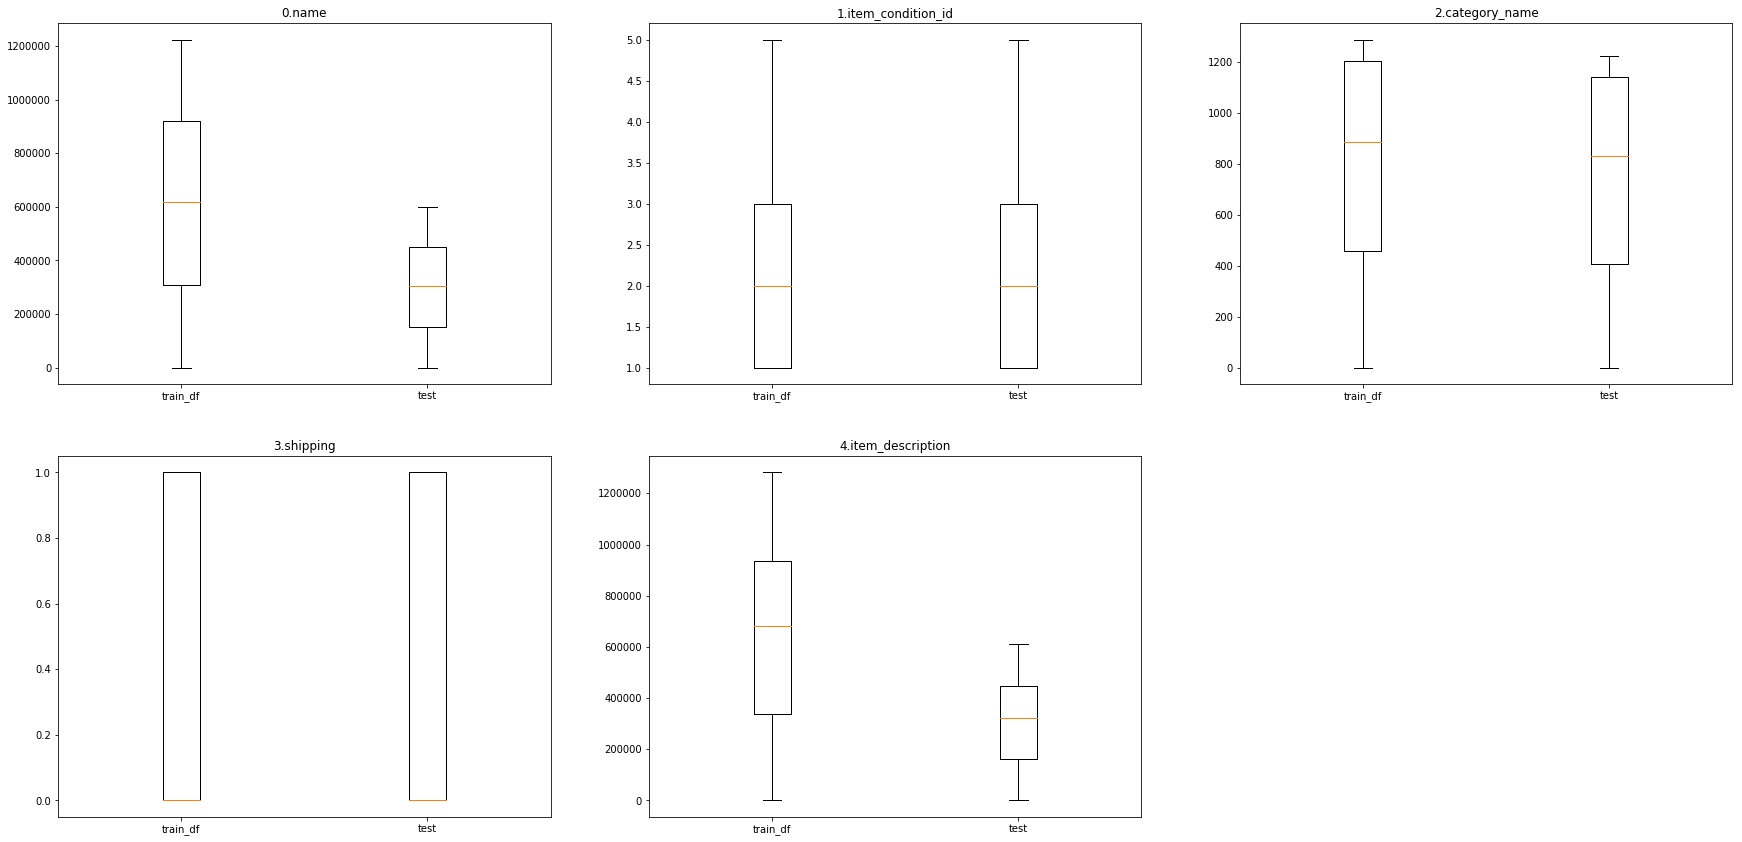

In [15]:
#列名をリスト化
columns_list = test_df.columns


fig = plt.figure(figsize=(30,150))
i = 0
for columns in columns_list :
        if columns == "test_id":
            #何もしない
            continue
    
        ax = fig.add_subplot(19,3,i+1)
        ax.boxplot([train_df[columns].dropna(),test_df[columns].dropna()],labels=["train_df","test"])
        ax.set_title(str(i)+"."+columns)
    
        i = i+1
        
plt.show()   

外れ値はないと推測します。